# Assignment 4: Softmax Regression, AdaBoost, & SVM Models — Public Health
<span style="color: red; font-weight: bold;">Disclaimer: The dataset used in this notebook is synthetic and has been created solely for educational purposes within a machine learning course in social science. It is not intended for use in drawing any medical, political, or other real-world conclusions.</span>

**Course:** Introduction to Machine Learning for Social Science<br>
**Course Code:** CSS5230<br>
**Teacher:** [Sahba Zojaji](https://myweb.cuhk.edu.cn/sahbazojaji/Home/Index)<br>
**University:** The Chinese University of Hong Kong, Shenzhen

## Summary

This notebook provides a comprehensive demonstration of applying the <u>Softmax Regression</u>, <u>AdaBoost</u>, and <u>SVM</u> on a **synthetic** public health dataset. The dataset includes the following columns: 

1. **ID**: A unique identifier for each individual.
2. **Age**: The age of the individual.
3. **Gender**: The gender of the individual (Male/Female).
4. **BMI**: Body Mass Index, a measure of body fat based on height and weight.
5. **Smoking Status**: The smoking status of the individual (Never, Former, Current).
6. **Exercise Frequency**: The frequency of exercise per week.
7. **Cholesterol Level**: The cholesterol level of the individual.
8. **Blood Pressure**: The blood pressure of the individual.
9. **Health Risk Score**: A calculated score representing the overall health risk of the individual.
10. **Health Risk Category**: The health risk category of the individual (Low, Medium, High).

### Goal:

The goal is to predict health risk categories (for classification) based on features such as age, gender, BMI, smoking status, exercise frequency, cholesterol level, and blood pressure.

## Loading the Dataset

We will load the public health dataset that contains features such as age, gender, BMI, smoking status, exercise frequency, cholesterol level, blood pressure, <u>health risk score (for regression)</u>, and <u>health risk category (for classification)</u>.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression  # For Softmax Regression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

# Load the dataset
data = pd.read_csv('public_health_dataset.csv')

# Display the first few rows of the dataset
data.head()

,ID,Age,Gender,BMI,Smoking Status,Exercise Frequency,Cholesterol Level,Blood Pressure,Health Risk Score,Health Risk Category
0,1,62,Female,22.812775,Former,4,119.690569,104.027015,74.966827,Medium
1,2,65,Female,18.902457,Former,0,151.031562,106.691143,78.305866,Medium
2,3,82,Female,31.286677,Former,0,167.483621,87.811173,95.605578,Medium
3,4,85,Male,23.427027,Former,2,124.839669,91.354148,80.921337,Medium
4,5,85,Female,25.755887,Former,6,192.860153,121.826556,95.150886,Medium


## Data Preprocessing  
Before building the models, we need to preprocess the data. Here's what we'll do:  

1. **Drop Unnecessary Columns**: Remove irrelevant columns to streamline the dataset.
2. **Encode Categorical Variables**: Transform categorical data (e.g., Gender) into numerical form.
3. **Split Data**: Separate features from target variables for classification and regression tasks.
4. **Divide into Training and Testing Sets**: Allocate 80% of data for training, 20% for testing.
5. **Normalize Features**: Scale features to a range of [0, 1] for consistent model performance.

In [13]:
# Drop the ID column as it is not useful for modeling
data = data.drop(columns=['ID'])

# Encode categorical variables (e.g., Gender, Smoking Status) into numerical values
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Smoking Status'] = label_encoder.fit_transform(data['Smoking Status'])

# Separate features (X) and target variables (y_class for classification)
X = data.drop(columns=['Health Risk Category', 'Health Risk Score'])  # Features
y_class = data['Health Risk Category']  # Target for classification

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

# Normalize the features using MinMaxScaler to bring all values into the range [0, 1]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **<span style="color:green">A. SoftMax Regression Model</span>**
We’ll use LogisticRegression (for multiclass classification; Python will do a softmax regression instead) to predict the Health Risk Category.

1. **Model Training**: Initialize and train the SoftMax regression model using scaled training data.
2. **Prediction**: Use the trained model to predict class labels on the scaled test data.
3. **Performance Evaluation**: Assess model accuracy and generate a detailed classification report.


In [14]:
# --- Softmax Regression (Multinomial Logistic Regression) ---
softmax_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
softmax_reg.fit(X_train_scaled, y_train_class)  # Train the model
y_pred_class_softmax = softmax_reg.predict(X_test_scaled)  # Predict on test data

# Evaluate Softmax Regression performance
accuracy_softmax = accuracy_score(y_test_class, y_pred_class_softmax)
print(f"Softmax Regression Accuracy: {accuracy_softmax}")

# Classification Report for Softmax Regression
print("Classification Report for Softmax Regression:")
print(classification_report(y_test_class, y_pred_class_softmax))

Softmax Regression Accuracy: 0.975
Classification Report for Softmax Regression:
              precision    recall  f1-score   support

        High       1.00      0.93      0.97        76
      Medium       0.96      1.00      0.98       124

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



### Confusion Matrix for SoftMax Regression

Create a heatmap to visualize the confusion matrix for the SoftMax regression model, comparing actual vs. predicted health risk categories.

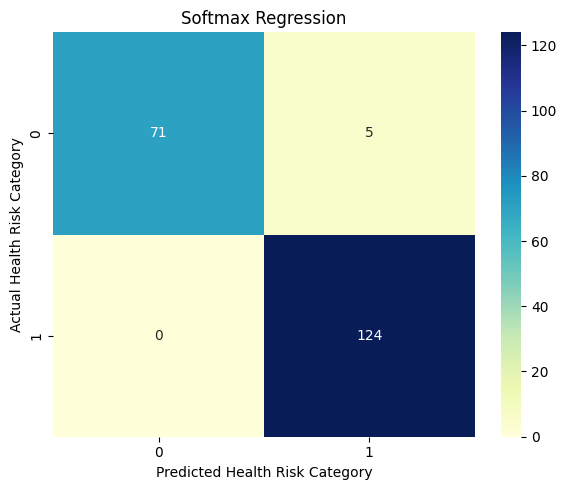

In [15]:
# --- Visualize Softmax Regression Results ---
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_class, y_pred_class_softmax), annot=True, cmap="YlGnBu", fmt='d')
plt.xlabel("Predicted Health Risk Category")
plt.ylabel("Actual Health Risk Category")
plt.title("Softmax Regression")
plt.tight_layout()
plt.show()

# <span style="color:red">1. SoftMax Regression Hyperparameter Tuning Assignment (5 points)</span>

## Objective
Explore the impact of various hyperparameters on the performance of the SoftMax Regression model.

## Instructions:
1. **max_iter**: Adjust the maximum number of iterations for the solver to converge (e.g., `[500, 1000, 2000]`).

For each combination of hyperparameters:
- Train the SoftMax Regression model.
- Evaluate the model using the following metrics:
  - Accuracy
  - Precision
  - Recall
  - F1 Score

- Provide the outputs of evaluation metrics and the confusion matrix for different combinations of hyperparameters in your report.

**At least 2 combinations must be included in your final report.**

## **<span style="color:green">B. AdaBoost Model</span>**
We’ll use AdaBoostClassifier to predict the Health Risk Category.

1. **Model Training**: Initialize and train the AdaBoost model using scaled training data.
2. **Prediction**: Use the trained model to predict class labels on the scaled test data.
3. **Performance Evaluation**: Assess model accuracy and generate a detailed classification report.


In [16]:
# --- AdaBoost Classifier ---
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train_scaled, y_train_class)  # Train the model
y_pred_class_adaboost = adaboost.predict(X_test_scaled)  # Predict on test data

# Evaluate AdaBoost performance
accuracy_adaboost = accuracy_score(y_test_class, y_pred_class_adaboost)
print(f"AdaBoost Accuracy: {accuracy_adaboost}")

# Classification Report for AdaBoost
print("Classification Report for AdaBoost:")
print(classification_report(y_test_class, y_pred_class_adaboost))


AdaBoost Accuracy: 0.945
Classification Report for AdaBoost:
              precision    recall  f1-score   support

        High       0.97      0.88      0.92        76
      Medium       0.93      0.98      0.96       124

    accuracy                           0.94       200
   macro avg       0.95      0.93      0.94       200
weighted avg       0.95      0.94      0.94       200



### Confusion Matrix for AdaBoost

Create a heatmap to visualize the confusion matrix for the AdaBoost model, comparing actual vs. predicted health risk categories.

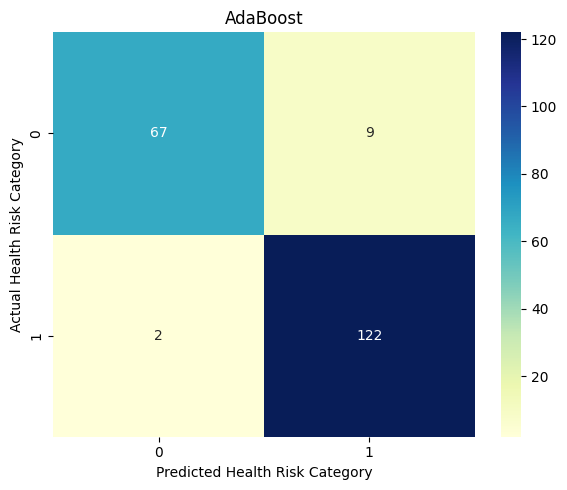

In [17]:
# --- Visualize AdaBoost Results ---
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_class, y_pred_class_adaboost), annot=True, cmap="YlGnBu", fmt='d')
plt.xlabel("Predicted Health Risk Category")
plt.ylabel("Actual Health Risk Category")
plt.title("AdaBoost")
plt.tight_layout()
plt.show()

# <span style="color:red">2. AdaBoost Hyperparameter Tuning Assignment (5 points)</span>

## Objective
Explore the impact of various hyperparameters on the performance of the AdaBoost model.

## Instructions:
1. **n_estimators:** Try different numbers of AdaBoost weak learners (e.g., n_estimators=100).
2. **learning_rate**: Experiment with different values of the learning rate (e.g., `[0.01, 0.1, 1.0, 10.0]`).
3. **max_iter**: Adjust the maximum number of iterations for the solver to converge (e.g., `[500, 1000, 2000]`).

For each combination of hyperparameters:
- Train the AdaBoost model.
- Evaluate the model using the following metrics:
  - Accuracy
  - Precision
  - Recall
  - F1 Score

- Provide the outputs of evaluation metrics and the confusion matrix for different combinations of hyperparameters in your report.

**At least 2 combinations must be included in your final report.**

## **<span style="color:green">C. Support Vector Machines (SVM) Model</span>**
We’ll use SVC to predict the Health Risk Category.

1. **Model Training**: Initialize and train the SVM model using scaled training data.
2. **Prediction**: Use the trained model to predict class labels on the scaled test data.
3. **Performance Evaluation**: Assess model accuracy and generate a detailed classification report.


In [18]:
# --- Support Vector Machine (SVM) ---
svm = SVC(kernel='linear', C=1.0, random_state=42)  # Linear kernel for simplicity
svm.fit(X_train_scaled, y_train_class)  # Train the model
y_pred_class_svm = svm.predict(X_test_scaled)  # Predict on test data

# Evaluate SVM performance
accuracy_svm = accuracy_score(y_test_class, y_pred_class_svm)
print(f"SVM Accuracy: {accuracy_svm}")

# Classification Report for SVM
print("Classification Report for SVM:")
print(classification_report(y_test_class, y_pred_class_svm))


SVM Accuracy: 0.985
Classification Report for SVM:
              precision    recall  f1-score   support

        High       1.00      0.96      0.98        76
      Medium       0.98      1.00      0.99       124

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



### Confusion Matrix for SVM

Create a heatmap to visualize the confusion matrix for the SVM model, comparing actual vs. predicted health risk categories.

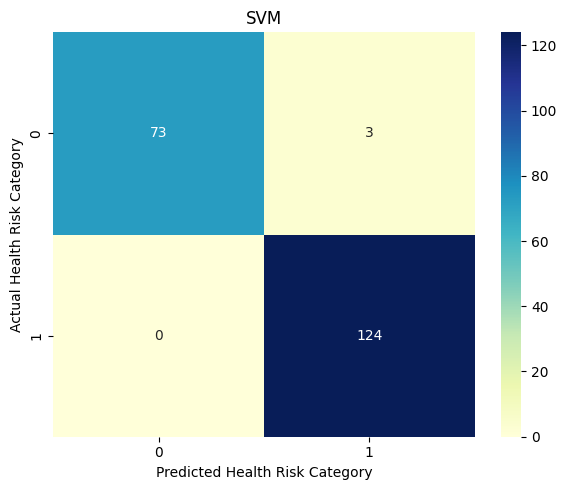

In [19]:
# --- Visualize SVM Results ---
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_class, y_pred_class_svm), annot=True, cmap="YlGnBu", fmt='d')
plt.xlabel("Predicted Health Risk Category")
plt.ylabel("Actual Health Risk Category")
plt.title("SVM")
plt.tight_layout()
plt.show()

# <span style="color:red">3. SVM Hyperparameter Tuning Assignment (5 points)</span>

## Objective
Explore the impact of various hyperparameters on the performance of the SVM model.

## Instructions:
1. **C**: Try different values of C (regularization parameter) to find the optimal balance between bias and variance (e.g., `[0.01, 0.1, 1.0, 10.0]`).
2. **max_iter**: Adjust the maximum number of iterations for the solver to converge (e.g., `[500, 1000, 2000]`).

For each combination of hyperparameters:
- Train the SVM model.
- Evaluate the model using the following metrics:
  - Accuracy
  - Precision
  - Recall
  - F1 Score

- Provide the outputs of evaluation metrics and the confusion matrix for different combinations of hyperparameters in your report.

**At least 2 combinations must be included in your final report.**